In [1]:
import cv2
import numpy as np
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
def looking_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [5]:
def cutout(addtxt, addoripic, addbacpic, position = 2):
## k是一个1-10之间的整数，数字越小越靠右 默认值是2（居中），默认保存文件名是1.jpeg
    path = addtxt
    img = np.loadtxt(path,int)
    img = img.astype(np.uint8)
    imgori = cv2.imread(addoripic)
    img_3 = np.stack((img,img,img), axis=-1)
    img_3 = img_3 > 0.1
    MASK_COLOR = [0,200,0]
    fg_image = np.zeros(img_3.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    bkgd_img = cv2.imread(addbacpic)
    # 从新背景图中切出原图大小的图块
    # 高度方向（Y方向）
    BOTTOM = bkgd_img.shape[0]
    TOP = BOTTOM-img_3.shape[0]
    # 宽度方向（X方向）
    LEFT = bkgd_img.shape[1]//position - img_3.shape[1]//position  # 从X方向中点向左偏移原始人像图片一半的宽
    RIGHT = LEFT + img_3.shape[1]
    new_bkgd = bkgd_img[TOP:BOTTOM,LEFT:RIGHT,:]
    new_bkgd_mask_img = np.where(img_3, imgori, new_bkgd)
    bkgd_img[TOP:BOTTOM,LEFT:RIGHT,:] = new_bkgd_mask_img
    # 不想要输出照片的话删除下面一句
    looking_img(bkgd_img)
    # 保存到1.jpeg
    cv2.imwrite('1.jpg', bkgd_img)

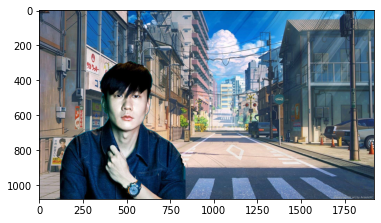

In [16]:
cutout('img01.txt', 'ljj.jpg', 'road.jpg', 10)

以下是展示过程的版本（如果需要用）

In [5]:
def look_img(img):
    plt.imshow(img)
    plt.show()
def looking_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [13]:
def cutout(addtxt, addoripic, addbacpic, position = 2):
## k是一个1-10之间的整数，数字越小越靠右 默认值是2（居中），默认保存文件名是1.jpeg
    path = addtxt
    img = np.loadtxt(path,int)
    img = img.astype(np.uint8)
    look_img(img)
    imgori = cv2.imread(addoripic)
    looking_img(imgori)
    img_3 = np.stack((img,img,img), axis=-1)
    img_3 = img_3 > 0.1
    MASK_COLOR = [0,200,0]
    fg_image = np.zeros(img_3.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    FG_img = np.where(img_3, imgori, fg_image)
    looking_img(FG_img)
    bkgd_img = cv2.imread(addbacpic)
    # 从新背景图中切出原图大小的图块
    # 高度方向（Y方向）
    BOTTOM = bkgd_img.shape[0]
    TOP = BOTTOM-img_3.shape[0]
    # 宽度方向（X方向）
    LEFT = bkgd_img.shape[1]//position - img_3.shape[1]//position  # 从X方向中点向左偏移原始人像图片一半的宽
    RIGHT = LEFT + img_3.shape[1]
    new_bkgd = bkgd_img[TOP:BOTTOM,LEFT:RIGHT,:]
    new_bkgd_mask_img = np.where(img_3, imgori, new_bkgd)
    looking_img(new_bkgd_mask_img)
    bkgd_img[TOP:BOTTOM,LEFT:RIGHT,:] = new_bkgd_mask_img
    looking_img(bkgd_img)

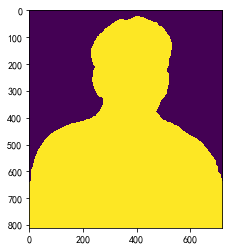

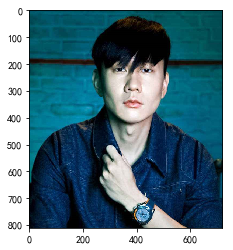

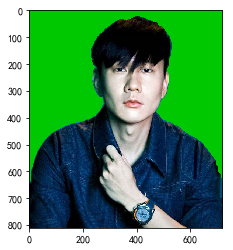

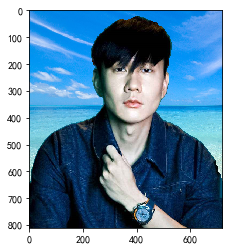

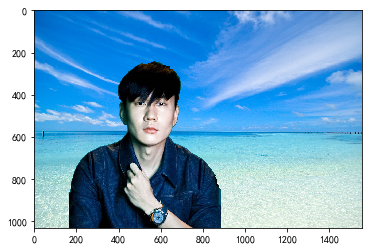

In [14]:
cutout('./img01.txt', '3.jpeg', 'beach3.png', 5)